In [1]:
# !pip install geopandas 

In [2]:
# !pip install matplotlib


In [3]:
# %pip install pygeos

In [4]:
# %pip install rtree

In [11]:
# All the import Libraries
import pandas as pd
import geopandas as gp
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

In [12]:
# read files
data = gp.read_file("../data/geo_data_trees.geojson")
polydata = gp.read_file("../data/circoscrizioni.json")

In [13]:
print(polydata.crs)
polydata.head(2)

epsg:4326


,numero_cir,area,perimetro,nome,fumetto,geometry
0,2,15712181,17850,MEANO,Circoscrizione n. 2 - MEANO,"POLYGON ((11.15678 46.11661, 11.15687 46.11666..."
1,3,36949609,38485,BONDONE,Circoscrizione n. 3 - BONDONE,"POLYGON ((11.08026 46.11571, 11.08026 46.11571..."


# Calculating area using geopandas.area

In [15]:
polydata_copy = polydata.copy()
polydata_copy= polydata_copy.to_crs({'init': 'epsg:32633'})
print(polydata_copy.crs)
polydata_copy["area(m2)"] = polydata_copy['geometry'].area
polydata_copy.head(10)


+init=epsg:32633 +type=crs


C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,numero_cir,area,perimetro,nome,fumetto,geometry,area(m2)
0,2,15712181,17850,MEANO,Circoscrizione n. 2 - MEANO,"POLYGON ((203044.805 5114187.221, 203051.692 5...",1.573604e+07
1,3,36949609,38485,BONDONE,Circoscrizione n. 3 - BONDONE,"POLYGON ((197127.561 5114376.228, 197127.561 5...",3.701146e+07
2,4,8663138,16403,SARDAGNA,Circoscrizione n. 4 - SARDAGNA,"POLYGON ((197706.671 5110278.623, 197704.201 5...",8.677127e+06
3,6,13199398,20575,ARGENTARIO,Circoscrizione n. 6 - ARGENTARIO,"POLYGON ((204000.910 5110170.320, 203999.958 5...",1.321934e+07
4,11,3073349,10962,S.GIUSEPPE-S.CHIARA,Circoscrizione n. 11 - S.GIUSEPPE-S.CHIARA,"POLYGON ((199220.493 5107933.053, 199221.348 5...",3.078116e+06
5,7,15433274,18464,POVO,Circoscrizione n. 7 - POVO,"POLYGON ((204734.917 5104413.406, 204735.120 5...",1.545520e+07
6,5,16687779,27197,RAVINA-ROMAGNANO,Circoscrizione n. 5 - RAVINA-ROMAGNANO,"POLYGON ((199192.520 5100133.847, 199198.110 5...",1.671439e+07
7,8,16409555,24413,MATTARELLO,Circoscrizione n. 8 - MATTARELLO,"POLYGON ((199192.520 5100133.847, 199231.881 5...",1.642222e+07
8,9,7342864,15395,VILLAZZANO,Circoscrizione n. 9 - VILLAZZANO,"POLYGON ((202529.680 5103085.363, 202543.660 5...",7.347780e+06
9,10,6962104,15418,OLTREFERSINA,Circoscrizione n. 10 - OLTREFERSINA,"POLYGON ((199591.347 5106192.940, 199613.636 5...",6.972767e+06


In [16]:
data

,Tree ID,Name,DBH (cm),Replacement Value (eur),Carbon Storage (kg),Carbon Storage (eur),Gross Carbon Sequestration (kg/yr),Gross Carbon Sequestration (eur/yr),Avoided Runoff (mcube/yr),Avoided Runoff (eur/yr),...,Oxygen Production (kg/yr),Height (m),Crown Height (m),Crown Width (m),Canopy Cover (m2),Leaf Area (m2),Leaf Biomass (kg),Latitude,Longitude,geometry
0,1.0,Acer pseudoplatanus,8,179.43,12,1.92,1.1,0.17,0,0.01,...,2.8,3.5,1,1.5,1.8,3.5,0.2,46.051599,11.072014,POINT (11.07201 46.05160)
1,2.0,Acer pseudoplatanus,8,179.43,12.9,2.07,1.1,0.18,0,0.01,...,3,5,1.5,1.5,1.8,4.2,0.3,46.051541,11.072108,POINT (11.07211 46.05154)
2,3.0,Acer pseudoplatanus,9,227.09,16.2,2.61,1.3,0.2,0,0.01,...,3.4,4.5,1.3,1.5,1.8,4,0.3,46.051668,11.071959,POINT (11.07196 46.05167)
3,4.0,Acer pseudoplatanus,11,482.46,25.7,4.13,1.6,0.26,0,0.02,...,4.3,5,1.5,2.5,4.9,7.1,0.5,46.063778,11.150170,POINT (11.15017 46.06378)
4,7.0,Cupressus,25,1110.29,448.2,72.02,11.1,1.78,0,0.02,...,29.5,8,2.4,1.5,1.8,6.6,1.5,46.052305,11.071550,POINT (11.07155 46.05230)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12508,17664.0,Philadelphus,28.2,1354.8,396.2,63.66,10.7,1.71,0.1,0.13,...,28.4,2.5,0.8,5.3,21.7,36.1,2.7,46.055851,11.129388,POINT (11.12939 46.05585)
12509,17665.0,Forsythia x intermedia,28.2,1354.8,320.9,51.56,10.5,1.68,0.1,0.21,...,27.9,8,2.4,5.3,21.7,59.9,4.6,46.055402,11.129206,POINT (11.12921 46.05540)
12510,17666.0,Aucuba japonica,28.2,1354.8,356.2,57.22,6.3,1.01,0.1,0.14,...,16.7,8,2.4,5.3,21.7,41.3,2.5,46.055867,11.129650,POINT (11.12965 46.05587)
12511,17667.0,Osmanthus fragrans,28.2,1354.8,240.7,38.67,4.3,0.6899999999999999,0.1,0.15,...,11.5,2.5,0.8,5.3,21.7,43.3,3.8,46.053467,11.121152,POINT (11.12115 46.05347)


<AxesSubplot: >

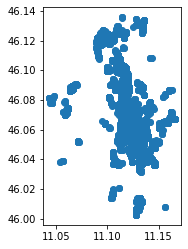

In [17]:
%matplotlib inline
data.plot()

In [18]:
polydata_copy


,numero_cir,area,perimetro,nome,fumetto,geometry,area(m2)
0,2,15712181,17850,MEANO,Circoscrizione n. 2 - MEANO,"POLYGON ((203044.805 5114187.221, 203051.692 5...",1.573604e+07
1,3,36949609,38485,BONDONE,Circoscrizione n. 3 - BONDONE,"POLYGON ((197127.561 5114376.228, 197127.561 5...",3.701146e+07
2,4,8663138,16403,SARDAGNA,Circoscrizione n. 4 - SARDAGNA,"POLYGON ((197706.671 5110278.623, 197704.201 5...",8.677127e+06
3,6,13199398,20575,ARGENTARIO,Circoscrizione n. 6 - ARGENTARIO,"POLYGON ((204000.910 5110170.320, 203999.958 5...",1.321934e+07
4,11,3073349,10962,S.GIUSEPPE-S.CHIARA,Circoscrizione n. 11 - S.GIUSEPPE-S.CHIARA,"POLYGON ((199220.493 5107933.053, 199221.348 5...",3.078116e+06
5,7,15433274,18464,POVO,Circoscrizione n. 7 - POVO,"POLYGON ((204734.917 5104413.406, 204735.120 5...",1.545520e+07
6,5,16687779,27197,RAVINA-ROMAGNANO,Circoscrizione n. 5 - RAVINA-ROMAGNANO,"POLYGON ((199192.520 5100133.847, 199198.110 5...",1.671439e+07
7,8,16409555,24413,MATTARELLO,Circoscrizione n. 8 - MATTARELLO,"POLYGON ((199192.520 5100133.847, 199231.881 5...",1.642222e+07
8,9,7342864,15395,VILLAZZANO,Circoscrizione n. 9 - VILLAZZANO,"POLYGON ((202529.680 5103085.363, 202543.660 5...",7.347780e+06
9,10,6962104,15418,OLTREFERSINA,Circoscrizione n. 10 - OLTREFERSINA,"POLYGON ((199591.347 5106192.940, 199613.636 5...",6.972767e+06


<AxesSubplot: >

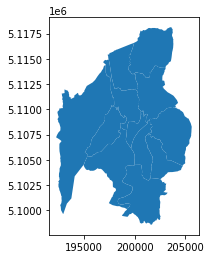

In [19]:
polydata_copy.plot()

In [20]:
# 12513 rows × 26 columns
# Basic information about all the columns of the data
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12513 entries, 0 to 12512
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Tree ID                              12512 non-null  float64 
 1   Name                                 12513 non-null  object  
 2   DBH (cm)                             12512 non-null  object  
 3   Replacement Value (eur)              12513 non-null  object  
 4   Carbon Storage (kg)                  12513 non-null  object  
 5   Carbon Storage (eur)                 12513 non-null  object  
 6   Gross Carbon Sequestration (kg/yr)   12513 non-null  object  
 7   Gross Carbon Sequestration (eur/yr)  12513 non-null  object  
 8   Avoided Runoff (mcube/yr)            12513 non-null  object  
 9   Avoided Runoff (eur/yr)              12513 non-null  object  
 10  Carbon Avoided (kg/yr)               0 non-null      object  
 11  Carbon 

In [21]:
data.tail()

,Tree ID,Name,DBH (cm),Replacement Value (eur),Carbon Storage (kg),Carbon Storage (eur),Gross Carbon Sequestration (kg/yr),Gross Carbon Sequestration (eur/yr),Avoided Runoff (mcube/yr),Avoided Runoff (eur/yr),...,Oxygen Production (kg/yr),Height (m),Crown Height (m),Crown Width (m),Canopy Cover (m2),Leaf Area (m2),Leaf Biomass (kg),Latitude,Longitude,geometry
12508,17664.0,Philadelphus,28.2,1354.8,396.2,63.66,10.7,1.71,0.1,0.13,...,28.4,2.5,0.8,5.3,21.7,36.1,2.7,46.055851,11.129388,POINT (11.12939 46.05585)
12509,17665.0,Forsythia x intermedia,28.2,1354.8,320.9,51.56,10.5,1.68,0.1,0.21,...,27.9,8,2.4,5.3,21.7,59.9,4.6,46.055402,11.129206,POINT (11.12921 46.05540)
12510,17666.0,Aucuba japonica,28.2,1354.8,356.2,57.22,6.3,1.01,0.1,0.14,...,16.7,8,2.4,5.3,21.7,41.3,2.5,46.055867,11.129650,POINT (11.12965 46.05587)
12511,17667.0,Osmanthus fragrans,28.2,1354.8,240.7,38.67,4.3,0.6899999999999999,0.1,0.15,...,11.5,2.5,0.8,5.3,21.7,43.3,3.8,46.053467,11.121152,POINT (11.12115 46.05347)
12512,NaN,Total,None,23086243,5484735,881216,71714,11522,2270,4317,...,191237.8,None,None,None,382146.7,1241575.9,101770.6,NaN,NaN,None


In [22]:
# deleting the last row
data = data.drop(data.index[-1])

In [23]:
# the last row is the total row for all the data so should be avoided 
# when including in the data values.
data.tail()

,Tree ID,Name,DBH (cm),Replacement Value (eur),Carbon Storage (kg),Carbon Storage (eur),Gross Carbon Sequestration (kg/yr),Gross Carbon Sequestration (eur/yr),Avoided Runoff (mcube/yr),Avoided Runoff (eur/yr),...,Oxygen Production (kg/yr),Height (m),Crown Height (m),Crown Width (m),Canopy Cover (m2),Leaf Area (m2),Leaf Biomass (kg),Latitude,Longitude,geometry
12507,17663.0,Philadelphus,28.2,1354.8,396.2,63.66,10.7,1.71,0.1,0.15,...,28.4,2.5,0.8,5.3,21.7,43.6,3.3,46.055912,11.129441,POINT (11.12944 46.05591)
12508,17664.0,Philadelphus,28.2,1354.8,396.2,63.66,10.7,1.71,0.1,0.13,...,28.4,2.5,0.8,5.3,21.7,36.1,2.7,46.055851,11.129388,POINT (11.12939 46.05585)
12509,17665.0,Forsythia x intermedia,28.2,1354.8,320.9,51.56,10.5,1.68,0.1,0.21,...,27.9,8,2.4,5.3,21.7,59.9,4.6,46.055402,11.129206,POINT (11.12921 46.05540)
12510,17666.0,Aucuba japonica,28.2,1354.8,356.2,57.22,6.3,1.01,0.1,0.14,...,16.7,8,2.4,5.3,21.7,41.3,2.5,46.055867,11.129650,POINT (11.12965 46.05587)
12511,17667.0,Osmanthus fragrans,28.2,1354.8,240.7,38.67,4.3,0.6899999999999999,0.1,0.15,...,11.5,2.5,0.8,5.3,21.7,43.3,3.8,46.053467,11.121152,POINT (11.12115 46.05347)


In [24]:
print(polydata_copy["geometry"])

0     POLYGON ((203044.805 5114187.221, 203051.692 5...
1     POLYGON ((197127.561 5114376.228, 197127.561 5...
2     POLYGON ((197706.671 5110278.623, 197704.201 5...
3     POLYGON ((204000.910 5110170.320, 203999.958 5...
4     POLYGON ((199220.493 5107933.053, 199221.348 5...
5     POLYGON ((204734.917 5104413.406, 204735.120 5...
6     POLYGON ((199192.520 5100133.847, 199198.110 5...
7     POLYGON ((199192.520 5100133.847, 199231.881 5...
8     POLYGON ((202529.680 5103085.363, 202543.660 5...
9     POLYGON ((199591.347 5106192.940, 199613.636 5...
10    POLYGON ((199864.503 5113510.249, 199857.577 5...
11    POLYGON ((200620.911 5109775.248, 200603.327 5...
Name: geometry, dtype: geometry


In [25]:

# Group the data by column 
grouped = data.groupby('Name')

# Let's see what we have
grouped

In [26]:
grouped.head()

,Tree ID,Name,DBH (cm),Replacement Value (eur),Carbon Storage (kg),Carbon Storage (eur),Gross Carbon Sequestration (kg/yr),Gross Carbon Sequestration (eur/yr),Avoided Runoff (mcube/yr),Avoided Runoff (eur/yr),...,Oxygen Production (kg/yr),Height (m),Crown Height (m),Crown Width (m),Canopy Cover (m2),Leaf Area (m2),Leaf Biomass (kg),Latitude,Longitude,geometry
0,1.0,Acer pseudoplatanus,8,179.43,12,1.92,1.1,0.17,0,0.01,...,2.8,3.5,1,1.5,1.8,3.5,0.2,46.051599,11.072014,POINT (11.07201 46.05160)
1,2.0,Acer pseudoplatanus,8,179.43,12.9,2.07,1.1,0.18,0,0.01,...,3,5,1.5,1.5,1.8,4.2,0.3,46.051541,11.072108,POINT (11.07211 46.05154)
2,3.0,Acer pseudoplatanus,9,227.09,16.2,2.61,1.3,0.2,0,0.01,...,3.4,4.5,1.3,1.5,1.8,4,0.3,46.051668,11.071959,POINT (11.07196 46.05167)
3,4.0,Acer pseudoplatanus,11,482.46,25.7,4.13,1.6,0.26,0,0.02,...,4.3,5,1.5,2.5,4.9,7.1,0.5,46.063778,11.150170,POINT (11.15017 46.06378)
4,7.0,Cupressus,25,1110.29,448.2,72.02,11.1,1.78,0,0.02,...,29.5,8,2.4,1.5,1.8,6.6,1.5,46.052305,11.071550,POINT (11.07155 46.05230)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12507,17663.0,Philadelphus,28.2,1354.8,396.2,63.66,10.7,1.71,0.1,0.15,...,28.4,2.5,0.8,5.3,21.7,43.6,3.3,46.055912,11.129441,POINT (11.12944 46.05591)
12508,17664.0,Philadelphus,28.2,1354.8,396.2,63.66,10.7,1.71,0.1,0.13,...,28.4,2.5,0.8,5.3,21.7,36.1,2.7,46.055851,11.129388,POINT (11.12939 46.05585)
12509,17665.0,Forsythia x intermedia,28.2,1354.8,320.9,51.56,10.5,1.68,0.1,0.21,...,27.9,8,2.4,5.3,21.7,59.9,4.6,46.055402,11.129206,POINT (11.12921 46.05540)
12510,17666.0,Aucuba japonica,28.2,1354.8,356.2,57.22,6.3,1.01,0.1,0.14,...,16.7,8,2.4,5.3,21.7,41.3,2.5,46.055867,11.129650,POINT (11.12965 46.05587)


In [27]:
data["Canopy Cover (m2)"]

0         1.8
1         1.8
2         1.8
3         4.9
4         1.8
         ... 
12507    21.7
12508    21.7
12509    21.7
12510    21.7
12511    21.7
Name: Canopy Cover (m2), Length: 12512, dtype: object

In [28]:
data['canopy_cov'] = data['Canopy Cover (m2)'].astype(float)

In [29]:
data['canopy_cov']

0         1.8
1         1.8
2         1.8
3         4.9
4         1.8
         ... 
12507    21.7
12508    21.7
12509    21.7
12510    21.7
12511    21.7
Name: canopy_cov, Length: 12512, dtype: float64

# Merging polygon and data

In [62]:
points = data["geometry"]

In [63]:
polydata['area(m2)'] = polydata_copy['area(m2)']

In [64]:
polydata[polydata.contains(points[0])]

,area,perimetro,nome,fumetto,geometry,area(m2),density
numero_cir,,,,,,,
4,8663138,16403,SARDAGNA,Circoscrizione n. 4 - SARDAGNA,"POLYGON ((11.09034 46.07917, 11.09032 46.07899...",3.078116e+06,0.000162


In [33]:
join = gp.sjoin(data, polydata, how="inner", predicate="within")

In [34]:
join.rename(columns={'nome': 'Region'}, inplace=True)
join

,Tree ID,Name,DBH (cm),Replacement Value (eur),Carbon Storage (kg),Carbon Storage (eur),Gross Carbon Sequestration (kg/yr),Gross Carbon Sequestration (eur/yr),Avoided Runoff (mcube/yr),Avoided Runoff (eur/yr),...,Longitude,geometry,canopy_cov,index_right,numero_cir,area,perimetro,Region,fumetto,area(m2)
0,1.0,Acer pseudoplatanus,8,179.43,12,1.92,1.1,0.17,0,0.01,...,11.072014,POINT (11.07201 46.05160),1.8,2,4,8663138,16403,SARDAGNA,Circoscrizione n. 4 - SARDAGNA,8.677127e+06
1,2.0,Acer pseudoplatanus,8,179.43,12.9,2.07,1.1,0.18,0,0.01,...,11.072108,POINT (11.07211 46.05154),1.8,2,4,8663138,16403,SARDAGNA,Circoscrizione n. 4 - SARDAGNA,8.677127e+06
2,3.0,Acer pseudoplatanus,9,227.09,16.2,2.61,1.3,0.2,0,0.01,...,11.071959,POINT (11.07196 46.05167),1.8,2,4,8663138,16403,SARDAGNA,Circoscrizione n. 4 - SARDAGNA,8.677127e+06
4,7.0,Cupressus,25,1110.29,448.2,72.02,11.1,1.78,0,0.02,...,11.071550,POINT (11.07155 46.05230),1.8,2,4,8663138,16403,SARDAGNA,Circoscrizione n. 4 - SARDAGNA,8.677127e+06
5,8.0,Acer pseudoplatanus,9,227.09,16.2,2.61,1.3,0.2,0,0.01,...,11.071766,POINT (11.07177 46.05200),1.8,2,4,8663138,16403,SARDAGNA,Circoscrizione n. 4 - SARDAGNA,8.677127e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12499,17655.0,Picea,34.3,2048.48,719,115.52,14.3,2.3,0.1,0.24,...,11.121614,POINT (11.12161 46.05350),21.0,4,11,3073349,10962,S.GIUSEPPE-S.CHIARA,Circoscrizione n. 11 - S.GIUSEPPE-S.CHIARA,3.078116e+06
12503,17659.0,Spiraea,28.2,1354.8,396.2,63.66,10.7,1.71,0.1,0.14,...,11.121604,POINT (11.12160 46.05350),21.7,4,11,3073349,10962,S.GIUSEPPE-S.CHIARA,Circoscrizione n. 11 - S.GIUSEPPE-S.CHIARA,3.078116e+06
12504,17660.0,Rhododendron obtusum,28.2,1354.8,465.3,74.77,8.5,1.37,0.1,0.17,...,11.119373,POINT (11.11937 46.05563),21.7,4,11,3073349,10962,S.GIUSEPPE-S.CHIARA,Circoscrizione n. 11 - S.GIUSEPPE-S.CHIARA,3.078116e+06
12505,17661.0,Pittosporum tobira,28.2,1354.8,396.4,63.69,7.4,1.19,0,0.02,...,11.121107,POINT (11.12111 46.05346),3.1,4,11,3073349,10962,S.GIUSEPPE-S.CHIARA,Circoscrizione n. 11 - S.GIUSEPPE-S.CHIARA,3.078116e+06


In [28]:
# join.to_csv (r'C:\Users\Kozy-Korpesh\Desktop\dv\Data-Visualization\data\merged_tree_and_region.csv', index = False, header=True)


In [35]:
join.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 12512 entries, 0 to 12511
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Tree ID                              12512 non-null  float64 
 1   Name                                 12512 non-null  object  
 2   DBH (cm)                             12512 non-null  object  
 3   Replacement Value (eur)              12512 non-null  object  
 4   Carbon Storage (kg)                  12512 non-null  object  
 5   Carbon Storage (eur)                 12512 non-null  object  
 6   Gross Carbon Sequestration (kg/yr)   12512 non-null  object  
 7   Gross Carbon Sequestration (eur/yr)  12512 non-null  object  
 8   Avoided Runoff (mcube/yr)            12512 non-null  object  
 9   Avoided Runoff (eur/yr)              12512 non-null  object  
 10  Carbon Avoided (kg/yr)               0 non-null      object  
 11  Carbon 

In [67]:
stackeddata = join[["Name", "Region","numero_cir","canopy_cov", "Oxygen Production (kg/yr)"]]


In [37]:
stackeddata['density'] = 1

C:\Users\dell\AppData\Local\Temp\ipykernel_11420\948644013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stackeddata['density'] = 1


In [68]:
stackeddata

,Name,Region,numero_cir,canopy_cov,Oxygen Production (kg/yr)
0,Acer pseudoplatanus,SARDAGNA,4,1.8,2.8
1,Acer pseudoplatanus,SARDAGNA,4,1.8,3
2,Acer pseudoplatanus,SARDAGNA,4,1.8,3.4
4,Cupressus,SARDAGNA,4,1.8,29.5
5,Acer pseudoplatanus,SARDAGNA,4,1.8,3.4
...,...,...,...,...,...
12499,Picea,S.GIUSEPPE-S.CHIARA,11,21.0,38.1
12503,Spiraea,S.GIUSEPPE-S.CHIARA,11,21.7,28.4
12504,Rhododendron obtusum,S.GIUSEPPE-S.CHIARA,11,21.7,22.8
12505,Pittosporum tobira,S.GIUSEPPE-S.CHIARA,11,3.1,19.8


In [70]:
# grouped_region_data = stackeddata.groupby(['numero_cir'])['canopy_cov'].sum() #.sort_values(ascending=False) #.unstack().fillna(0)
# grouped_region_data = grouped_region_data.reset_index()
# grouped_region_data

In [40]:
grouped_region_data['density'] = grouped_region_data['canopy_cov']/grouped_region_data['area(m2)']
# grouped_region_data = grouped_region_data.drop(['area(m2)','canopy_cov'],axis=1)

In [41]:
grouped_region_data = grouped_region_data.rename(columns={"numero_cir": "id","area(m2)":"area"})
grouped_region_data

,id,area,canopy_cov,density
0,1,8.831921e+06,27279.5,0.003089
1,2,1.573604e+07,3136.1,0.000199
2,3,3.701146e+07,5979.6,0.000162
3,4,8.677127e+06,389.2,0.000045
4,5,1.671439e+07,6289.5,0.000376
5,6,1.321934e+07,12416.1,0.000939
6,7,1.545520e+07,2866.9,0.000185
7,8,1.642222e+07,4995.4,0.000304
8,9,7.347780e+06,6352.5,0.000865
9,10,6.972767e+06,87988.8,0.012619


In [35]:
# grouped_region_data.to_csv(r'C:\Users\Kozy-Korpesh\Desktop\dv\Data-Visualization\data\grouped_region_for_map_data.csv',index=False,header=True)

In [42]:
polydata['density'] = grouped_region_data['density']
# polydata
polydata.drop(['area','perimetro','fumetto','area(m2)','density'], axis=1)
polydata = polydata.set_index('numero_cir')


In [37]:
# polydata.to_json(r'C:\Users\Kozy-Korpesh\Desktop\dv\Data-Visualization\data\grouped_for_map_data.json')

In [38]:
with open(r'E:\Documents\GitHub\Data-Visualization\data\grouped_for_map_data.json', 'w') as f:
    f.write(polydata.to_json())

In [71]:
stackeddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12512 entries, 0 to 12511
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       12512 non-null  object 
 1   Region                     12512 non-null  object 
 2   numero_cir                 12512 non-null  int64  
 3   canopy_cov                 12512 non-null  float64
 4   Oxygen Production (kg/yr)  12512 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 844.5+ KB


In [72]:
stackeddata["Oxygen Production (kg/yr)"] = data["Oxygen Production (kg/yr)"].astype(float)

C:\Users\dell\AppData\Local\Temp\ipykernel_11420\2962972345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stackeddata["Oxygen Production (kg/yr)"] = data["Oxygen Production (kg/yr)"].astype(float)


In [73]:
# stackeddata['count'] = 1
grouped_region_data = stackeddata.groupby(by=['Region', 'numero_cir']).sum() #.sort_values(ascending=False) 

# grouped_region_data = stackeddata.groupby(['Region','numero_cir'])["Oxygen Production (kg/yr)"].sum().sort_values(ascending=False) 
# grouped_region_data = stackeddata.groupby(['Region','numero_cir'])['count'].sum() #.sort_values(ascending=False) #.unstack().fillna(0)
grouped_region_data = grouped_region_data.reset_index()
grouped_region_data

,Region,numero_cir,canopy_cov,Oxygen Production (kg/yr)
0,ARGENTARIO,6,12416.1,6848.3
1,BONDONE,3,5979.6,4559.9
2,CENTRO STORICO PIEDICASTELLO,12,131189.1,53818.4
3,GARDOLO,1,27279.5,12353.7
4,MATTARELLO,8,4995.4,3492.6
5,MEANO,2,3136.1,2961.1
6,OLTREFERSINA,10,87988.8,43064.0
7,POVO,7,2866.9,2762.2
8,RAVINA-ROMAGNANO,5,6289.5,3680.8
9,S.GIUSEPPE-S.CHIARA,11,93333.1,51717.3


In [74]:
grouped_region_data = grouped_region_data.rename(columns={"numero_cir": "id"})
grouped_region_data

,Region,id,canopy_cov,Oxygen Production (kg/yr)
0,ARGENTARIO,6,12416.1,6848.3
1,BONDONE,3,5979.6,4559.9
2,CENTRO STORICO PIEDICASTELLO,12,131189.1,53818.4
3,GARDOLO,1,27279.5,12353.7
4,MATTARELLO,8,4995.4,3492.6
5,MEANO,2,3136.1,2961.1
6,OLTREFERSINA,10,87988.8,43064.0
7,POVO,7,2866.9,2762.2
8,RAVINA-ROMAGNANO,5,6289.5,3680.8
9,S.GIUSEPPE-S.CHIARA,11,93333.1,51717.3


In [56]:
# grouped_region_data.to_csv(r'C:\Users\Kozy-Korpesh\Desktop\dv\Data-Visualization\data\grouped_region_for_map_data_tree_abundance.csv',index=False,header=True)

In [80]:
grouped_region_data.sort_values(by=["Oxygen Production (kg/yr)"], ascending=False)

,Region,id,canopy_cov,Oxygen Production (kg/yr)
2,CENTRO STORICO PIEDICASTELLO,12,131189.1,53818.4
9,S.GIUSEPPE-S.CHIARA,11,93333.1,51717.3
6,OLTREFERSINA,10,87988.8,43064.0
3,GARDOLO,1,27279.5,12353.7
0,ARGENTARIO,6,12416.1,6848.3
11,VILLAZZANO,9,6352.5,5392.4
1,BONDONE,3,5979.6,4559.9
8,RAVINA-ROMAGNANO,5,6289.5,3680.8
4,MATTARELLO,8,4995.4,3492.6
5,MEANO,2,3136.1,2961.1


In [78]:
max(grouped_region_data["Oxygen Production (kg/yr)"])/7

7688.342857142858

In [76]:
grouped_region_data.to_csv(r'E:\Documents\GitHub\Data-Visualization\data\grouped_region_for_map_oxygen_production.csv',index=False,header=True)